In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory('dataset/train',target_size=(150, 150),class_mode='categorical')
val_generator = train_datagen.flow_from_directory('dataset/validation',target_size=(150, 150),class_mode='categorical')

Found 1360 images belonging to 15 classes.
Found 1360 images belonging to 15 classes.
Found 1360 images belonging to 15 classes.


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [5]:
num_classes = train_generator.num_classes
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(150,150,3)),  
  MaxPool2D(),Flatten(),                                                                                             
  Dense(num_classes, activation='softmax')                            
])

In [6]:
model.compile('adam', 'categorical_crossentropy',metrics=['accuracy'])             

In [7]:
model.fit(train_generator, validation_data=val_generator, epochs=3) 

Epoch 1/3
43/43 [==============================] - 26s 581ms/step - loss: 3.1412 - accuracy: 0.2890 - val_loss: 1.1129 - val_accuracy: 0.7287
Epoch 2/3
43/43 [==============================] - 23s 542ms/step - loss: 0.8202 - accuracy: 0.7684 - val_loss: 0.3330 - val_accuracy: 0.9375
Epoch 3/3
43/43 [==============================] - 23s 544ms/step - loss: 0.2216 - accuracy: 0.9551 - val_loss: 0.0732 - val_accuracy: 1.0000


In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

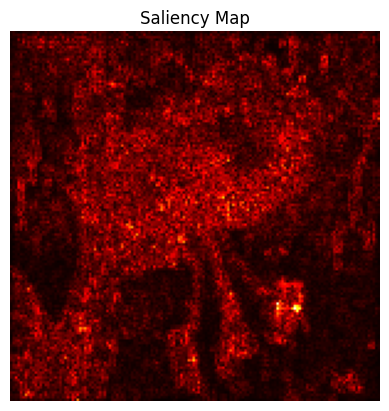

In [28]:
sample_image, label = next(val_generator)
img = sample_image[0] 
img_batch = np.expand_dims(img, axis=0)
img_tensor = tf.convert_to_tensor(img_batch)
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    pred = model(img_tensor)
    loss = pred[0]
grads = tape.gradient(loss, img_tensor)[0].numpy()
saliency = np.max(np.abs(grads), axis=-1)
plt.imshow(saliency, cmap='hot')
plt.title("Saliency Map")
plt.axis('off')
plt.show()

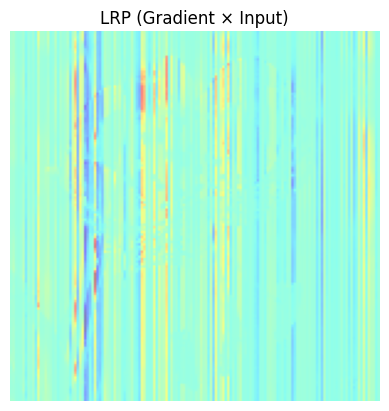

In [29]:
relevance = grads[0] * img
lrp_map = np.sum(relevance, axis=-1)
plt.imshow(lrp_map, cmap='jet',alpha=0.5)
plt.title("LRP (Gradient × Input)")
plt.axis('off')
plt.show()

## SURROGATE EXPLAINER

In [1]:
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('diabetes.csv')

[Text(0.45969202898550726, 0.9615384615384616, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = Diabetes'),
 Text(0.16696859903381642, 0.8846153846153846, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = Diabetes'),
 Text(0.3133303140096618, 0.9230769230769231, 'True  '),
 Text(0.06038647342995169, 0.8076923076923077, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = Diabetes'),
 Text(0.01932367149758454, 0.7307692307692307, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = Diabetes'),
 Text(0.00966183574879227, 0.6538461538461539, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]\nclass = Diabetes'),
 Text(0.028985507246376812, 0.6538461538461539, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = Diabetes'),
 Text(0.01932367149758454, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No Diabetes'),
 Text(0.03864734299516908

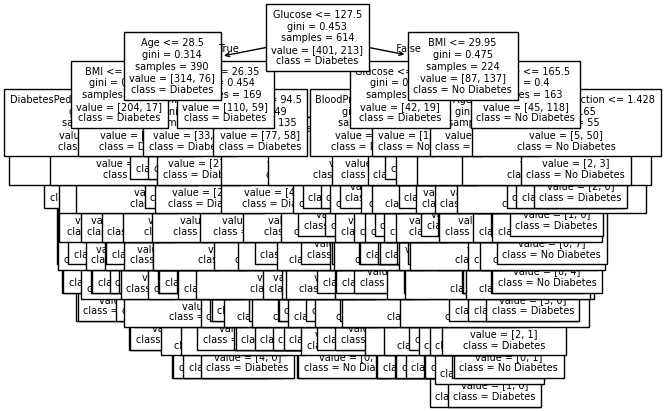

In [7]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
plot_tree(dt_model,
feature_names=X.columns,class_names=['Diabetes','No Diabetes'], fontsize = 7)